In [1]:
# Corbin Graham
# MATH 535 Homework 1

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, transform, util
import copy

In [2]:
# Necessary Functions for saving and displaying images

# Save image to file using spatial domain format (png)
def save_image(img, location="output.png"):
  location = "/content/" + location # ***REMOVE THIS IF YOU ARE NOT USING COLAB***
  io.imsave(location, img)
  print("Image saved as:", location)

# Print image to screen
#   - bw (Black & White Option)
#   - title (Title to print)
def display_image(img, bw=False, title=""):
  if(bw): plt.imshow(img, cmap=plt.cm.gray)
  else: plt.imshow(img)
  plt.title(title)
  plt.show()

def bitget(img, bit):
  return np.unpackbits(img)[:,bit]

def bitplane(img, plane):
  return img & plane

# Examples (testing)
# display_image(img, title="Color")
# display_image(img_bw, bw=True)
# img_bw

In [3]:
def get_size(img):
  print(img.shape)
  (M,N) = img.shape
  return (M,N)

def get_payload(img, rate):
  (M,N) = get_size(img)
  capacity = np.ceil(np.log2(M*N))
  K = int(rate * (M*N - capacity))
  payload = np.random.randint(2, size=K)
  return payload

def msg_diff(cover,stego):
  M,N = get_size(cover)
  size = M*N
  cover = cover.reshape(-1)
  stego = stego.reshape(-1)
  diff = 0
  for i,o in enumerate(cover):
    # print(o, stego[i])
    if o != stego[i]: diff += 1
  return (diff / size) / 100

In [4]:
def embed(img, payload):
  M,N = get_size(img)

  K = len(payload)
  t = int(np.ceil(np.log2(M*N)))
  img_dst = copy.deepcopy(img)

  kb = np.binary_repr(K, width=t)
  # print("Len (msg, img):", int(kb,2), M*N)

  tmp = img_dst.reshape(-1)
  h = 0

  # Embed K with t-bits
  for i in range(t):
    lsb = np.binary_repr(tmp[i], width=8)
    lsb = lsb[:-1] + kb[i]
    tmp[i] = int(lsb,2)
    h = i + 1

  # Embed Message Bits
  for i,p in enumerate(payload):
    i = i + h
    lsb = np.binary_repr(tmp[i], width=8)
    lsb = lsb[:-1] + str(p)
    # print(tmp[i])
    tmp[i] = int(lsb,2)
    # print(tmp[i])
    # print()

  img_dst = tmp.reshape(*img_dst.shape)
  return img_dst

# Problem 1: implement LSB replacement on a single image.
---
In this problem, your goal is to write code that creates a stego image by embedding a randomly generated message bitstream into a cover image, 
then extracts the message from the stego image. 

In [5]:
# Import provided image as img
# img_location = "/content/265701.JPG" # Change this location to where your image is stored
#                                              #  I uploaded the image to Colab and this is its temp location
# img = io.imread(img_location)

# #Save the image in a spacial domain format
# save_image(util.img_as_ubyte(img), location="original.png")

# # Set the random seed for numpy for replication
# np.random.seed(0)

In [6]:
# # Create bw image
# img_bw = color.rgb2gray(img)

# # Reshape (resize with aliasing)
# img_bw = transform.resize(img_bw, (1024, 1024), anti_aliasing=False)

# # Normalize the b&w image
# img_bw = util.img_as_ubyte(img_bw)

# # Save gray scale cover image in spatial domain format
# save_image(util.img_as_ubyte(img_bw), location="cover.png")

## Problem 1: Output
---

In [7]:
# rate = 0.1
# payload = get_payload(img_bw, rate)
# img_stego = embed(img_bw, payload)
# save_image(img_stego, location="stego.png")

In [8]:
# # Printouts

# # 1. Pixel Dimensions
# print("The pixel dimension of the images used in Problem 1 are", get_size(img_bw))
# # 2. Length of message bitstream
# print("The number of bits embedded is 10% of M*N:", len(payload))
# # 3. Display (3) Images, Color, Cover, Stego
# display_image(img, title="Color"); display_image(img_bw, bw=True, title="Grayscale Cover"); display_image(img_stego, bw=True, title="Stego Image")
# # 4. Difference between cover and stego
# difference=img_bw-img_stego; display_image(difference, bw=True, title="Difference")
# # 5. Percentage calculated between the embedded and extracted message
# calc=msg_diff(img_cover,img_stego)
# print(f"Percentage Difference: {calc:.2%}")

In [9]:

# img_stego = embed(img_bw, payload)
# save_image(img_stego)

# # Normalize img_bw
# # img_bw = util.img_as_ubyte(img_bw)

# msg = get_message(img_bw, img_stego, payload)
# print(payload, msg)
# payload_rate = len(payload) / (1024*1024)
# msg_rate = len(msg) / (1024*1024)
# payload_rate, msg_rate, len(payload)

In [10]:
  # M,N = get_size(stego)

  # stego = stego.reshape(-1)
  # t = int(np.ceil(np.log2(M*N)))
  # K = ""
  # for i in range(t):
  #   lsb = np.binary_repr(stego[i], width=8)
  #   K += lsb[-1:]
  # K = int(K,2)

  # msg = ""
  # for i in range(K):
  #   i = i + t
  #   lsb = np.binary_repr(stego[i], width=8)
  #   msg += lsb[-1:]

  # return np.array(list(msg))

# msg = get_message(img_stego)
# payload_str = "".join(str(e) for e in payload)
# msg_str = "".join(str(e) for e in msg)
# # Verify the messages match
# payload_str == msg_str

# Problem 2
---

In [11]:
import os
from tabulate import tabulate

In [12]:
def get_images(folder="/content/covers"):
  images = {} # name: image
  for file in os.listdir(folder):
    name, ext = os.path.splitext(file)
    path = os.path.join(folder, file)
    img = io.imread(path)
    img = color.rgb2gray(img)
    img = util.img_as_ubyte(img) # Normalize
    images[name] = img
  return images

images = get_images()

In [15]:
def embed_multiple(images, rate, save=True):
  final = {}
  for name,img in images.items():
    print(name)
    dst = embed(img, get_payload(img, rate))
    final[name] = dst
    if save: save_image(dst, name + ".png")
  return final

stego_images_p1 = embed_multiple(images, 0.1, save=False)
stego_images_p2 = embed_multiple(images, 0.4, save=False)

265701
(3456, 4608)
(3456, 4608)
269181
(3456, 4608)
(3456, 4608)
268021
(3456, 4608)
(3456, 4608)
266861
(3456, 4608)
(3456, 4608)
265701
(3456, 4608)
(3456, 4608)
269181
(3456, 4608)
(3456, 4608)
268021
(3456, 4608)
(3456, 4608)
266861
(3456, 4608)
(3456, 4608)


In [24]:
def change_rate(covers, stegos):
  table = [["Image", "Change Rate"]]
  rates = []
  for name,b in stegos.items():
    a = covers[name]
    d = msg_diff(a,b)
    rates.append(d)
    table.append([name, f"{d:.2%}"])
  return rates,table

In [25]:
r1,t1 = change_rate(images, stego_images_p1)
r2,t2 = change_rate(images, stego_images_p2)

(3456, 4608)
(3456, 4608)
(3456, 4608)
(3456, 4608)
(3456, 4608)
(3456, 4608)
(3456, 4608)
(3456, 4608)


# Problem 2: Output
---

In [42]:
print("Total Images Processed:", len(stego_images_p1), "\n")

print(tabulate(t1, headers='firstrow'), "\n")
print(tabulate(t2, headers='firstrow'), "\n")
print("Average Change Rate (10%):", f"{np.average(r1):.2%}")
print("Average Change Rate (40%):", f"{np.average(r2):.2%}")
print()
print("Standard Deviation (10%):", f"{np.std(r1)}")
print("Standard Deviation (40%):", f"{np.std(r2)}")

Total Images Processed: 4 

  Image  Change Rate
-------  -------------
 265701  0.05%
 269181  0.05%
 268021  0.05%
 266861  0.05% 

  Image  Change Rate
-------  -------------
 265701  0.20%
 269181  0.20%
 268021  0.20%
 266861  0.20% 

Average Change Rate (10%): 0.05%
Average Change Rate (40%): 0.20%

Standard Deviation (10%): 3.899135565164054e-07
Standard Deviation (40%): 3.3216902942246664e-07


Image: '265701' (10% Embedding Rate)


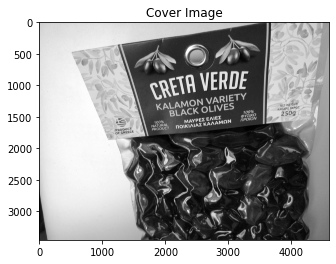

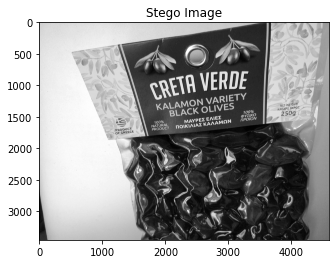

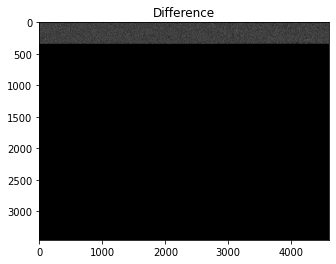

In [54]:
r_img = list(stego_images_p1)[0]
print(f"Image: '{r_img}' (10% Embedding Rate)")
display_image(images[r_img], title="Cover Image", bw=True); display_image(stego_images_p1[r_img], bw=True, title="Stego Image");
difference=images[r_img]-stego_images_p1[r_img]; display_image(difference, bw=True, title="Difference")